In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from isolation_forest import IsolationForest


plt.style.use("seaborn")

In [3]:
def score(X, n_trees, sub_sample_size):
    model = IsolationForest(n_trees=n_trees, sub_sample_size=sub_sample_size)
    model.fit(X)
    average_path_length, anomaly_scores = model.anomaly_score(X)
    prediction = model.predict(anomaly_scores)
    return average_path_length, anomaly_scores, prediction

In [7]:
df = pd.read_csv("/Users/okroshiashvili/Desktop/anomaly_detection/data/data.csv")

In [8]:
average_path_length, anomaly_scores, prediction = score(df, n_trees=1000, sub_sample_size=256)

df["score"] = prediction

In [9]:
df.head()

,data,score
0,1,1
1,2,1
2,2,1
3,3,1
4,100,-1


In [10]:
# These are outlier values according to Isolation Forest

df["data"].iloc[np.where(prediction == -1)[0]]

4     100
11      8
13      8
21     99
31     88
37      6
42      9
59      6
79    200
94    155
Name: data, dtype: int64

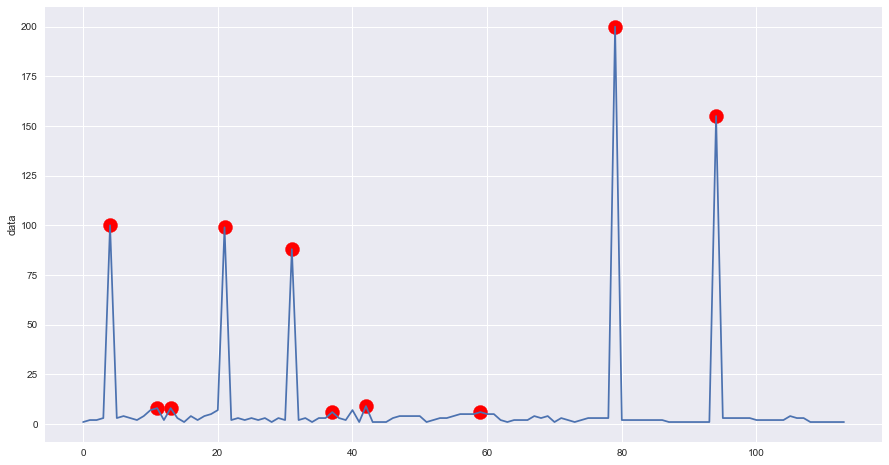

In [11]:
outlier_values = df["data"].iloc[np.where(prediction == -1)[0]]

# Plot the result
plt.figure(figsize=(15, 8))

sns.lineplot(x=range(len(df)), y=df["data"])

plt.scatter(x=outlier_values.index, y=outlier_values, marker='o', s=200, color="red");